### Loading dataset

In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv('./data/titanic.csv')

In [3]:
type(titanic_df)

pandas.core.frame.DataFrame

In [5]:
titanic_df.head(4)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female


In [6]:
titanic_df.shape

(1313, 11)

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 112.9+ KB


### How many survived Vs. not survived

get the unique values of a column

In [8]:
titanic_df['survived'].unique()

array([1, 0], dtype=int64)

In [9]:
titanic_df['survived'].value_counts()

0    864
1    449
Name: survived, dtype: int64

In [12]:
titanic_df['survived'].value_counts(normalize = True)

0    0.658035
1    0.341965
Name: survived, dtype: float64

### People of what age were on board?

In [13]:
import matplotlib.pyplot as plt
import seaborn as sn

(array([22., 13., 12., 12., 23., 84., 65., 73., 68., 37., 50., 29., 38.,
        28., 23., 17., 18.,  7.,  9.,  5.]),
 array([ 0.1667  ,  3.708365,  7.25003 , 10.791695, 14.33336 , 17.875025,
        21.41669 , 24.958355, 28.50002 , 32.041685, 35.58335 , 39.125015,
        42.66668 , 46.208345, 49.75001 , 53.291675, 56.83334 , 60.375005,
        63.91667 , 67.458335, 71.      ]),
 <a list of 20 Patch objects>)

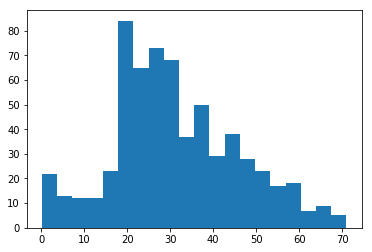

In [18]:
plt.hist( titanic_df['age'].dropna(), bins = 20 )  # dropna() to drop any null value in the column, bins will fine-grain the age category

### Gender vs Survival

In [21]:
pd.crosstab( titanic_df.sex, titanic_df.survived, margins = True )

survived,0,1,All
sex,,,
female,156,307,463
male,708,142,850
All,864,449,1313


In [30]:
pd.crosstab( titanic_df.sex, titanic_df.survived, normalize = 'index' )

survived,0,1
sex,,
female,0.336933,0.663067
male,0.832941,0.167059


In [31]:
pd.crosstab( titanic_df.sex, titanic_df.survived, normalize = 'columns' )

survived,0,1
sex,,
female,0.180556,0.683742
male,0.819444,0.316258


### Class vs Survival

In [22]:
pd.crosstab( titanic_df.pclass, titanic_df.survived, margins = True )

survived,0,1,All
pclass,,,
1st,129,193,322
2nd,161,119,280
3rd,574,137,711
All,864,449,1313


### How many children on board who were less than 10 years old?

In [23]:
children_df = titanic_df[titanic_df['age'] < 10]

In [24]:
children_df.shape

(46, 11)

### How many children survived?

In [25]:
 children_df['survived'].value_counts()

1    33
0    13
Name: survived, dtype: int64

### Average age of each passaenger class ?

In [26]:
titanic_df.groupby('pclass')['age'].mean()

pclass
1st    39.667773
2nd    28.300314
3rd    24.519658
Name: age, dtype: float64

### Encoding the sex column

In [27]:
titanic_df['gender'] = titanic_df['sex'].map(lambda x: int(x == 'male'))

In [28]:
titanic_df

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,gender
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,0
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,1
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,1
5,6,1st,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,male,1
6,7,1st,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female,0
7,8,1st,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male,1
8,9,1st,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female,0
9,10,1st,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,(22),male,1
